<h1>Presentation MNIST Demo</h1>

<h2>Normal model training...</h2>

In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K

num_classes = 10
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = (x_train - 0.5) * 2
x_test = (x_test - 0.5) * 2
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h2>How to see the differences between some potential explanation tools?</h2>

In [2]:
# import sanity checker library
import sys
sys.path.append("..")

import sanity_checker
from sanity_checker.sanity import KerasSanityChecker, SanityCheckMethods
from sanity_checker.similarity import mse, spearman_rank
from sanity_checker.explanation import KerasExplanation, ExplanationMethods

import pandas as pd

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

# Load model and create explanation, picking a few choices.
model = keras.models.load_model('mnist_keras.h5')
explanation = KerasExplanation([ExplanationMethods.SALIENCY, 
                                ExplanationMethods.GRADIENT_INPUT, 
                                ExplanationMethods.INTEGRATED_GRADIENTS, 
                                ExplanationMethods.BACKPROP,
                                ExplanationMethods.GRADCAM,
                                ExplanationMethods.ELRP],
                               x_test[0:10], y_test[0:10])

/Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/concise/utils/plot.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/concise/utils/plot.py:116: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


Instructions for updating:
Colocations handled automatically by placer.


2019-05-02 22:07:26,840 [WARNING] From /Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-05-02 22:07:26,889 [WARNING] From /Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


2019-05-02 22:07:27,224 [WARNING] From /Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


<h2>Easy to use library calls:</h2>

/Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encou

                       0
saliency    2.551333e-07
grad*input  2.429164e-07
intgrad     5.011690e-05
backprop    0.000000e+00
gradcam     0.000000e+00
elrp        2.416965e-07
                   0
saliency    0.266234
grad*input -0.017795
intgrad    -0.015454
backprop    1.000000
gradcam          NaN
elrp       -0.017688


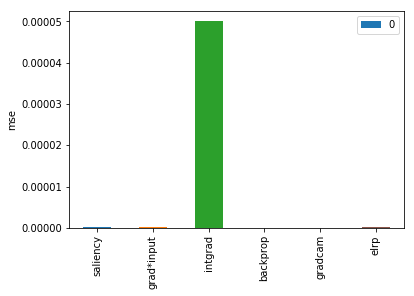

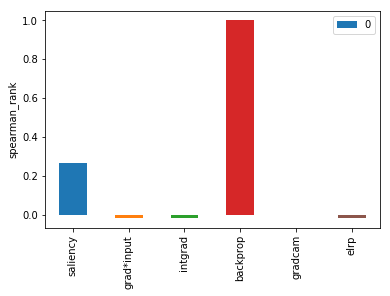

In [3]:
checker = KerasSanityChecker(model)
result = checker.evaluate(SanityCheckMethods.COMPLETE_RANDOMIZATION, explanation, [mse, spearman_rank], plot=True)

<h2>Cascading randomization:</h2>

       saliency    grad*input   intgrad  backprop  gradcam          elrp
0  1.784162e-08  1.267284e-08  0.000003       0.0      0.0  1.264356e-08
1  7.306236e-05  6.021834e-05  0.000068       0.0      0.0  6.002911e-05
2  7.011191e-05  5.782900e-05  0.000068       0.0      0.0  5.761370e-05
3  3.328233e-06  2.835884e-06  0.000053       0.0      0.0  2.821974e-06
4  3.845303e-06  3.307246e-06  0.000054       0.0      0.0  3.268720e-06
5  8.797148e-07  7.995654e-07  0.000051       0.0      0.0  7.935991e-07
6  8.933515e-07  8.282479e-07  0.000051       0.0      0.0  8.240460e-07
7  1.914779e-07  1.737977e-07  0.000050       0.0      0.0  1.724638e-07
   saliency  grad*input   intgrad  backprop  gradcam      elrp
0  0.957172    0.955599  0.970063       1.0      NaN  0.955541
1  0.521202   -0.098458 -0.013067       1.0      NaN -0.098687
2  0.514276   -0.120561 -0.031817       1.0      NaN -0.120599
3  0.358192   -0.004589  0.037896       1.0      NaN -0.004558
4  0.352066   -0.009371  0.0

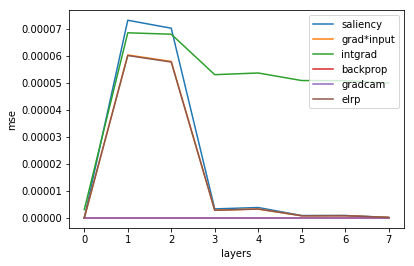

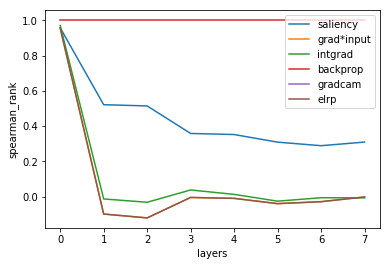

In [4]:
result = checker.evaluate(SanityCheckMethods.CASCADING_RANDOMIZATION, explanation, [mse, spearman_rank], plot=True)

<h2>Compare with randomly permuted labels:</h2>

/Users/brandon/research/qdata4kipoi/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


                       0
saliency    5.517898e-08
grad*input  5.388150e-08
intgrad     4.971292e-05
backprop    8.094763e-02
gradcam     1.622782e-01
elrp        5.323573e-08
                   0
saliency    0.355967
grad*input  0.037970
intgrad     0.034429
backprop         NaN
gradcam          NaN
elrp        0.037875


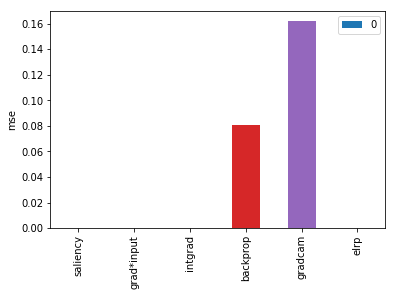

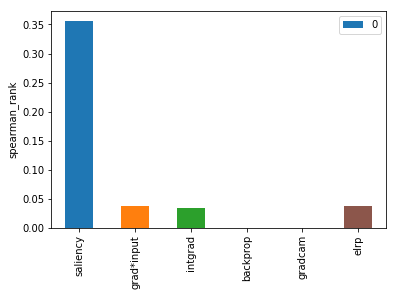

In [5]:
random_data_model = keras.models.load_model('mnist_keras_random.h5')
result = checker.evaluate(SanityCheckMethods.DATA_RANDOMIZATION, explanation, [mse, spearman_rank], random_data_model=random_data_model, plot=True)